In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [5]:
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.shape

(50, 5)

In [7]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
sum(df.duplicated())

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [13]:
df.iplot(kind='box')

In [14]:
df1 = pd.DataFrame(df.sum()).reset_index()
df1.columns = ["Crime", "Total"]
df1

,Crime,Total
0,Murder,389.4
1,Assault,8538.0
2,UrbanPop,3277.0
3,Rape,1061.6


In [15]:
fig = px.pie(df1, values='Total', names='Crime', title="Crime Rate", color_discrete_sequence=px.colors.sequential.Bluyl_r)
fig.show()

In [16]:
fig = px.bar(df1, x='Crime', y='Total', title="Crime Rate")
fig.show()

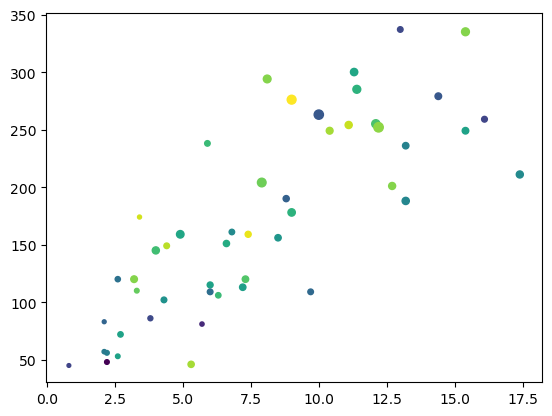

In [17]:
plt.scatter(df['Murder'], df['Assault'], df['Rape'], df['UrbanPop'])

### Data Transform

In [18]:
scaler = MinMaxScaler()
minmax = scaler.fit_transform(df)
minmax

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [19]:
scaler = StandardScaler()
standard = scaler.fit_transform(df)

### K Means

In [20]:
kmodel = KMeans(n_clusters=4)
pred = kmodel.fit_predict(minmax)

In [21]:
df['cluster'] = pred

In [22]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,0


In [23]:
# plt.scatter(df['Murder'], df['Assault'], df['UrbanPop'], df['Rape'], df['cluster'])

In [24]:
kmodel.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])